# DS4200 Homework 4

Due: Friday Mar 28th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file included with the coding results and and two `png` files from the part 3 to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Part 1: Altair interactive plots

Gapminder is a non-profit organization that promotes global sustainable development and seeks to bridge the gap between misconceptions and data-driven understanding. We are going to explore the a small subset of its data with the information of average income, health score and population for each country in the world. The region information is also provided. 

In [10]:
import altair as alt
import pandas as pd
import geopandas as gpd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import zipfile

with zipfile.ZipFile("crime.csv.zip") as z:
    # List all files inside the ZIP
    for name in z.namelist():
        print(name)

    # Pick the actual CSV (not the __MACOSX one)
    with z.open("crime - crime.csv.csv") as f:
        df = pd.read_csv(f)

# Now df is your DataFrame
df.head()

crime - crime.csv.csv
__MACOSX/._crime - crime.csv.csv


/var/folders/5q/f4fq7xxn49dfgfd3t9j4pwgr0000gn/T/ipykernel_40027/1062081656.py:17: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495.0,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795.0,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329.0,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92.0,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36.0,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [11]:
from shapely.geometry import Point

#Convert to geodataframe

df = df.dropna(subset=["Lat", "Long"])  # remove rows without coordinates
geometry = [Point(xy) for xy in zip(df["Long"], df["Lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gdf.head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,geometry
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495.0,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",POINT (-71.12119 42.26261)
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795.0,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",POINT (-71.13531 42.35211)
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329.0,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",POINT (-71.07693 42.30813)
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92.0,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",POINT (-71.05965 42.35945)
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36.0,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",POINT (-71.02466 42.37526)


In [12]:
districts = gpd.read_file("Boston_Police_Districts.geojson").to_crs(epsg=4326)

joined = gpd.sjoin(gdf, districts, how="left", predicate="within")


DataSourceError: Boston_Police_Districts.geojson: No such file or directory

In [13]:
# AGGREGATE

counts = joined.groupby("DISTRICT").size().reset_index(name="crime_count")


NameError: name 'joined' is not defined

### Part 1.1 Add selection (10 points)

Make a scatter plot to show the relationship between average personal income and average health score. Use different colors for different regions. Also add tooltip to it to show the information about the country name and population. In the end, allow the user to select a single country to highlight while all the other become light grey. 

In [2]:
highlight = alt.selection_point(fields=['country'], on='click', clear='true')

scatter = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Health Score'),
    color=alt.condition(highlight, 'region:N', alt.value('lightgray')),
    tooltip=['country:N', 'population:Q']
).add_params(
    highlight
).properties(
    width=600,
    height=400,
    title='Income vs Health Score by Country'
)

scatter

alt.Chart(...)

### Part 1.2 Customize the color (5 points)

Now choose a customized color map for the previous question. Explain how you choose the color map and apply it to the plot. Please do NOT use the pre-defined color palettes in matplotlib, instead, use the websites like Color Brewer or Colorgorical. You can use following line to include your own selected color list (legend_color is your color number list): 

    alt.Color('region:N', scale=alt.Scale(range=legend_color))

In [3]:
legend_color = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

highlight = alt.selection_point(fields=['country'], on='click', clear='true')

scatter = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Health Score'),
    color=alt.condition(highlight, alt.Color('region:N', scale=alt.Scale(range=legend_color)), alt.value('lightgray')),
    tooltip=['country:N', 'population:Q']
).add_params(
    highlight
).properties(
    width=600,
    height=400,
    title='Income vs Health Score by Country'
)

scatter

alt.Chart(...)

Explanation: I used Color Brewer to select a qualitative palette with high contrast and good accessibility. The colors are easily distinguishable and are also inclusive to colorblind users. I avoided using default or matplotlib palettes to make the plot more visually distinct and customizable

### Part 1.3 Select across multiple panels (5 points)

Instead of using the point selection, now add an interval selection to the figure in part 1.1, such that the user can select over any income range (only income range), and then generate a second plot on the right to show the relationship between income and population for the given range. 

In [4]:
income_selection = alt.selection_interval(encodings=['x'])


first = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Health Score'),
    color=alt.Color('region:N'),
    tooltip=['country:N', 'income:Q', 'health:Q', 'population:Q']
).add_params(
    income_selection
).properties(
    width=400,
    height=400,
    title='Select Income Range'
)
second = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('population:Q', title='Population'),
    color=alt.Color('region:N'),
    tooltip=['country:N', 'income:Q', 'population:Q']
).transform_filter(
    income_selection
).properties(
    width=300,
    height=400,
    title='Population vs Income (Selected Range)'
)

first | second

alt.HConcatChart(...)

### Part 1.4 Data binding (10 points)

Modified on the part 1.1 figure, instead of the using the legend, now include a radio button on the region such that each selection only highlights one region and make the other points to be grey. Also add the selection to the opacity such that only the selected region has a opacity value 1 while the other are 0.1. 

In [5]:
region_options = gapminder['region'].unique().tolist()

region_select = alt.selection_point(
    fields=['region'],
    bind=alt.binding_radio(name='Region:', options=region_options)
)

highlight = alt.selection_point(fields=['country'], on='click', clear='true')

scatter = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Health Score'),
    color=alt.condition(region_select, 'region:N', alt.value('lightgray')),
    opacity=alt.condition(region_select, alt.value(1), alt.value(0.1)),
    tooltip=['country:N', 'population:Q']
).add_params(
    region_select
).properties(
    width=600,
    height=400,
    title='Income vs Health Score by Country'
)


scatter

alt.Chart(...)

### Part 1.5 Add filter with bars (10 points)

Modified on the part 1.1 figure, add a slider bar such that for a given value on the bar, we only show the data such that the population of the country is less than the value. You can set the initial cutoff value as 1000000. 

In [6]:
highlight = alt.selection_point(fields=['country'], on='click', clear='true')


pop_filter = alt.param(
    name='PopFilter',
    value=1000000,
    bind=alt.binding_range(
        min=0,
        max=gapminder['population'].max(),
        step=10000,
        name='Max Population:'
    )
)

scatter = alt.Chart(gapminder).mark_circle(size=100).encode(
    x='income:Q',
    y='health:Q',
    color=alt.condition(highlight, 'region:N', alt.value('lightgray')),
    tooltip=['country:N', 'population:Q']
).transform_filter(
    'datum.population < PopFilter'
).add_params(
    highlight,
    pop_filter
).properties(
    width=600,
    height=400,
    title='Income vs Health Score (Filtered by Population)'
)

scatter

alt.Chart(...)

### Part 2 Explore the TX population and unemployment rate
#### Part 2.1 Prepare the geospatial data (10 points)

On Canvas, there is a csv file called "unemp.csv", which contains county-level information about unemployment rate and population. Use county level geo-spatial data provided in the lecture to merge two datasets. Then extract the part of data for Texas and make a map for Texas county. Only show the boundary for the counties. 

Note: Texas has 254 counties, more than any other U.S. state.

In [7]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [8]:
unemp = pd.read_csv("unemp.csv")
unemp.head()

,Unnamed: 0,fips,pop,unemp
0,1,1001,23288,9.7
1,2,1003,81706,9.1
2,3,1005,9703,13.4
3,4,1007,8475,12.1
4,5,1009,25306,9.9


In [9]:
county_df = geopandas.read_file('ne_10m_admin_2_counties')
county_df['FIPS_clean'] = county_df['ADM2_CODE'].str.replace('USA-', '').astype(int)
county_df.head()

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry,FIPS_clean
0,Admin-2 scale rank,0,USA-53073,US-53,US,1,Whatcom,Whatcom County,None,County,...,Уотком,Whatcom,Whatcom,Вотком,واٹکم کاؤنٹی، واشنگٹن,Whatcom,霍特科姆县,霍特科姆縣,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532...",53073
1,Admin-2 scale rank,0,USA-53047,US-53,US,1,Okanogan,Okanogan County,None,County,...,Оканоган,Okanogan,Okanogan,Оканоґан,اوکاناگن کاؤنٹی، واشنگٹن,Okanogan,奥卡诺根县,奧卡諾根縣,"POLYGON ((-120.85196 48.99251, -120.67495 48.9...",53047
2,Admin-2 scale rank,0,USA-53019,US-53,US,1,Ferry,Ferry County,None,County,...,Ферри,Ferry,Ferry,Феррі,فیری کاؤنٹی، واشنگٹن,Ferry,费里县,費里縣,"POLYGON ((-118.83688 48.99251, -118.69668 48.9...",53019
3,Admin-2 scale rank,0,USA-53065,US-53,US,1,Stevens,Stevens County,None,County,...,Стивенс,Stevens,Stevens,Стівенс,سٹیونس کاؤنٹی، واشنگٹن,Stevens,史蒂文斯县,史蒂文斯縣,"POLYGON ((-118.21996 48.99251, -118.03723 48.9...",53065
4,Admin-2 scale rank,0,USA-53051,US-53,US,1,Pend Oreille,Pend Oreille County,None,County,...,Панд-Орей,Pend Oreille,Pend Oreille,Понд-Орей,پینڈ اورائل کاؤنٹی، واشنگٹن,Pend Oreille,庞多雷县,龐多雷縣,"POLYGON ((-117.42951 48.99251, -117.37787 48.9...",53051


In [10]:
merged_df = county_df.merge(unemp, left_on='FIPS_clean', right_on='fips')
merged_df.head()

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry,FIPS_clean,Unnamed: 0,fips,pop,unemp
0,Admin-2 scale rank,0,USA-53073,US-53,US,1,Whatcom,Whatcom County,None,County,...,واٹکم کاؤنٹی، واشنگٹن,Whatcom,霍特科姆县,霍特科姆縣,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532...",53073,2988,53073,106595,7.8
1,Admin-2 scale rank,0,USA-53047,US-53,US,1,Okanogan,Okanogan County,None,County,...,اوکاناگن کاؤنٹی، واشنگٹن,Okanogan,奥卡诺根县,奧卡諾根縣,"POLYGON ((-120.85196 48.99251, -120.67495 48.9...",53047,2975,53047,23873,7.4
2,Admin-2 scale rank,0,USA-53019,US-53,US,1,Ferry,Ferry County,None,County,...,فیری کاؤنٹی، واشنگٹن,Ferry,费里县,費里縣,"POLYGON ((-118.83688 48.99251, -118.69668 48.9...",53019,2961,53019,2985,11.3
3,Admin-2 scale rank,0,USA-53065,US-53,US,1,Stevens,Stevens County,None,County,...,سٹیونس کاؤنٹی، واشنگٹن,Stevens,史蒂文斯县,史蒂文斯縣,"POLYGON ((-118.21996 48.99251, -118.03723 48.9...",53065,2984,53065,19047,10.5
4,Admin-2 scale rank,0,USA-53051,US-53,US,1,Pend Oreille,Pend Oreille County,None,County,...,پینڈ اورائل کاؤنٹی، واشنگٹن,Pend Oreille,庞多雷县,龐多雷縣,"POLYGON ((-117.42951 48.99251, -117.37787 48.9...",53051,2977,53051,5315,12.1


<Axes: >

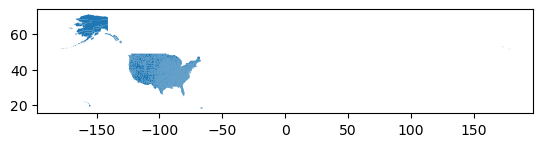

In [11]:
merged_df.plot()

In [12]:
df_filtered = merged_df[merged_df["fips"].astype(str).str.startswith("48")]
df_filtered.head()

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry,FIPS_clean,Unnamed: 0,fips,pop,unemp
84,Admin-2 scale rank,0,USA-48141,US-48,US,1,El Paso,El Paso County,None,County,...,ایل پاسو کاؤنٹی، ٹیکساس,El Paso,厄尔巴索县,厄爾巴索縣,"POLYGON ((-106.47313 31.75507, -106.4928 31.75...",48141,2591,48141,310013,9.8
85,Admin-2 scale rank,0,USA-48229,US-48,US,1,Hudspeth,Hudspeth County,None,County,...,ہڈسپیتھ کاؤنٹی، ٹیکساس,Hudspeth,哈得斯佩斯县,哈得斯佩斯郡,"POLYGON ((-105.24905 30.79884, -105.25949 30.8...",48229,2635,48229,1622,6.5
86,Admin-2 scale rank,0,USA-48377,US-48,US,1,Presidio,Presidio County,None,County,...,پریسڈیو کاؤنٹی، ٹیکساس,Presidio,普雷西迪奥县,普雷西迪奧郡,"POLYGON ((-104.33848 29.52401, -104.34903 29.5...",48377,2709,48377,3739,17.8
87,Admin-2 scale rank,0,USA-48243,US-48,US,1,Jeff Davis,Jeff Davis County,None,County,...,جیف ڈیوس کاؤنٹی، ٹیکساس,Jeff Davis,杰夫·戴维斯县,傑夫·戴維斯縣,"POLYGON ((-104.93434 30.61054, -104.94106 30.6...",48243,2642,48243,1267,5.6
88,Admin-2 scale rank,0,USA-48443,US-48,US,1,Terrell,Terrell County,None,County,...,ٹیریل کاؤنٹی، ٹیکساس,Terrell,特勒爾縣,特勒爾縣,"POLYGON ((-102.27618 29.86955, -102.28902 29.8...",48443,2742,48443,385,7.8


<Axes: >

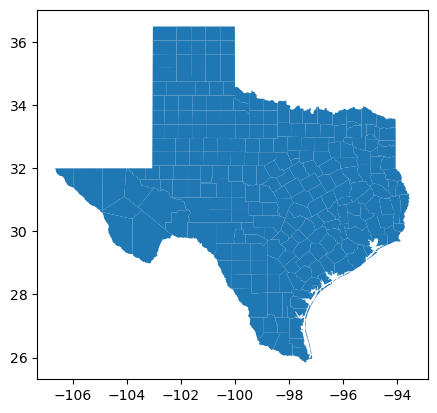

In [13]:
df_filtered.plot()

#### Part 2.2 creating choropleth maps and customization (5 points)

Make a choropleth maps with unemployment rate. Choose another color map from
https://matplotlib.org/stable/users/explain/colors/colormaps.html. Give a title to the figure (use `plt.title`) as well as a title to the legend. 


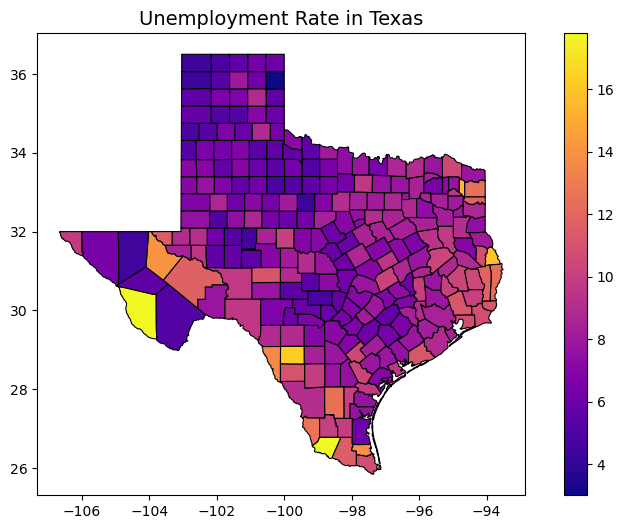

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df_filtered.plot(column="unemp",  
                 cmap="plasma",
                 linewidth=0.8,  
                 edgecolor="black",  
                 legend=True,  
                 ax=ax)

# Add titles
plt.title("Unemployment Rate in Texas", fontsize=14)

# cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax)
# cbar.set_label("Unemployment Rate")

# Show the plot
plt.show()

#### Part 2.3 Handle the missing values (10 points)

Make a copy of your Texas data. Like what we have done in the lecture, randomly select 30 counties and set the unemployment rate as NaN. Plot the choropleth maps for the unemployment rate again. Define the color, boundary, and hatch pattern for the missing value areas. Also include a legend for the missing areas. Chooes a hatch pattern that is different from the lecture note from here: https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html

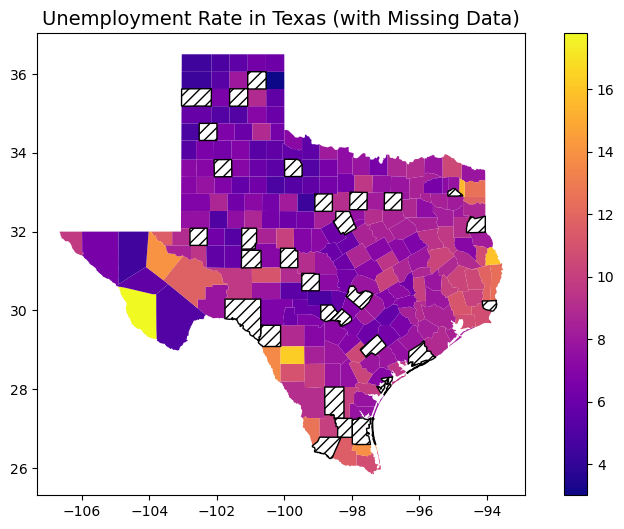

In [15]:
import numpy as np
texas_df = df_filtered.copy();

# np.random.seed(12)

random_counties = texas_df.sample(n=30, random_state=42)
texas_df.loc[random_counties.index, 'unemp'] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

texas_df.plot(column="unemp",
              cmap="plasma",
              legend=True,
              ax=ax)

texas_df[texas_df["unemp"].isna()].plot(
    color="none",
    edgecolor="black",
    hatch="///",
    ax=ax,
    label="Missing Data"
)

plt.title("Unemployment Rate in Texas (with Missing Data)", fontsize=14)


plt.show()

#### Part 2.4 Interative Multiple-layer plots (15 points)

There is another attribute in the data which is called `pop`. This attributes represent the population in each county. This is a highly skewed attributed thus we first create a new attribute called `logpop`, which is the log of the population. Then make an interactive map with two layers, one layer is the `logpop` and the second layer is `unemp`. Overlap both layers on the same map. The user should be able to select one or both layer to show and when they click the county, the information of population and unemployment rate are displayed. 

Also include another map layer into the figure. Use the code here (m is the name of the map): 

    folium.TileLayer("CartoDB positron", show=True).add_to(m) 

You can check the page here for other map choices: https://leaflet-extras.github.io/leaflet-providers/preview/

Note: You may need to add some transparency to the top layer so that the bottom layer can be seen when both are selected. 

In [18]:
import geodatasets
import folium

In [19]:
m = texas_df.explore(
    column = "pop",
    cmap = 'OrRd', 
    tooltip = ['NAME'],
    popup = ['unemp', 'pop'], 
    name = "Population", 
    scheme = "naturalbreaks", 
    k = 8,
    legend = True, 
    legend_kwds = dict(colorbar = False)
)

texas_df.explore(
    m = m,
    column = "unemp",
    cmap = 'OrRd', 
    tooltip = ['NAME'],
    popup = ['unemp', 'pop'], 
    name = "Unemployment", 
    scheme = "naturalbreaks", 
    k = 8, 
    legend = True, 
    legend_kwds = dict(colorbar = False)
)


folium.TileLayer('CartoDB positron', show = True).add_to(m)
folium.LayerControl().add_to(m)
m

### Part 3: Tableau with unemployment data

#### Part 3.1 Tableau maps (15 points)

Now let's try to re-create the unemployment map through Tableau. Connect the unemp.csv to the Tableau. Before making any plots, we need to do some data cleaning. Right now, the fips code is considered as integer thus cannot be recognized by the Tableau. Go through each step here and in the end, export a png file and include it with your submission. 

+ Connect the unemp.csv to Tableau
+ In the begining, the fips code are considered as integer and some of them are not 5 digit, so we need to create a new column (Create Calculated Field) with the line (to convert 2115, to "02115"):
    Right("00" + Str([Fips]),5)
+ Use the similar way to create another column which only keeps the state level FIPS code. Like "02" for "02115".
+ Choose "county" as the geographical role for the 5-digit FIPS code.
+ On a Worksheet, make a choropleth map for the unemployment rate for Texas counties. You can use the 2-digit state code to filter the data.
+ Edit the figure title, legend title and customize the color choice for the legend.
+ On the top, choose the "map" and "backgroup map", then select "normal". (Feel free to explore how the other options look like)
+ Generate a new dashboard and add the map sheet to it.
+ Set the legend to be floating and put it inside the map.
+ Export the dashboard to a png file and include with the submission. 

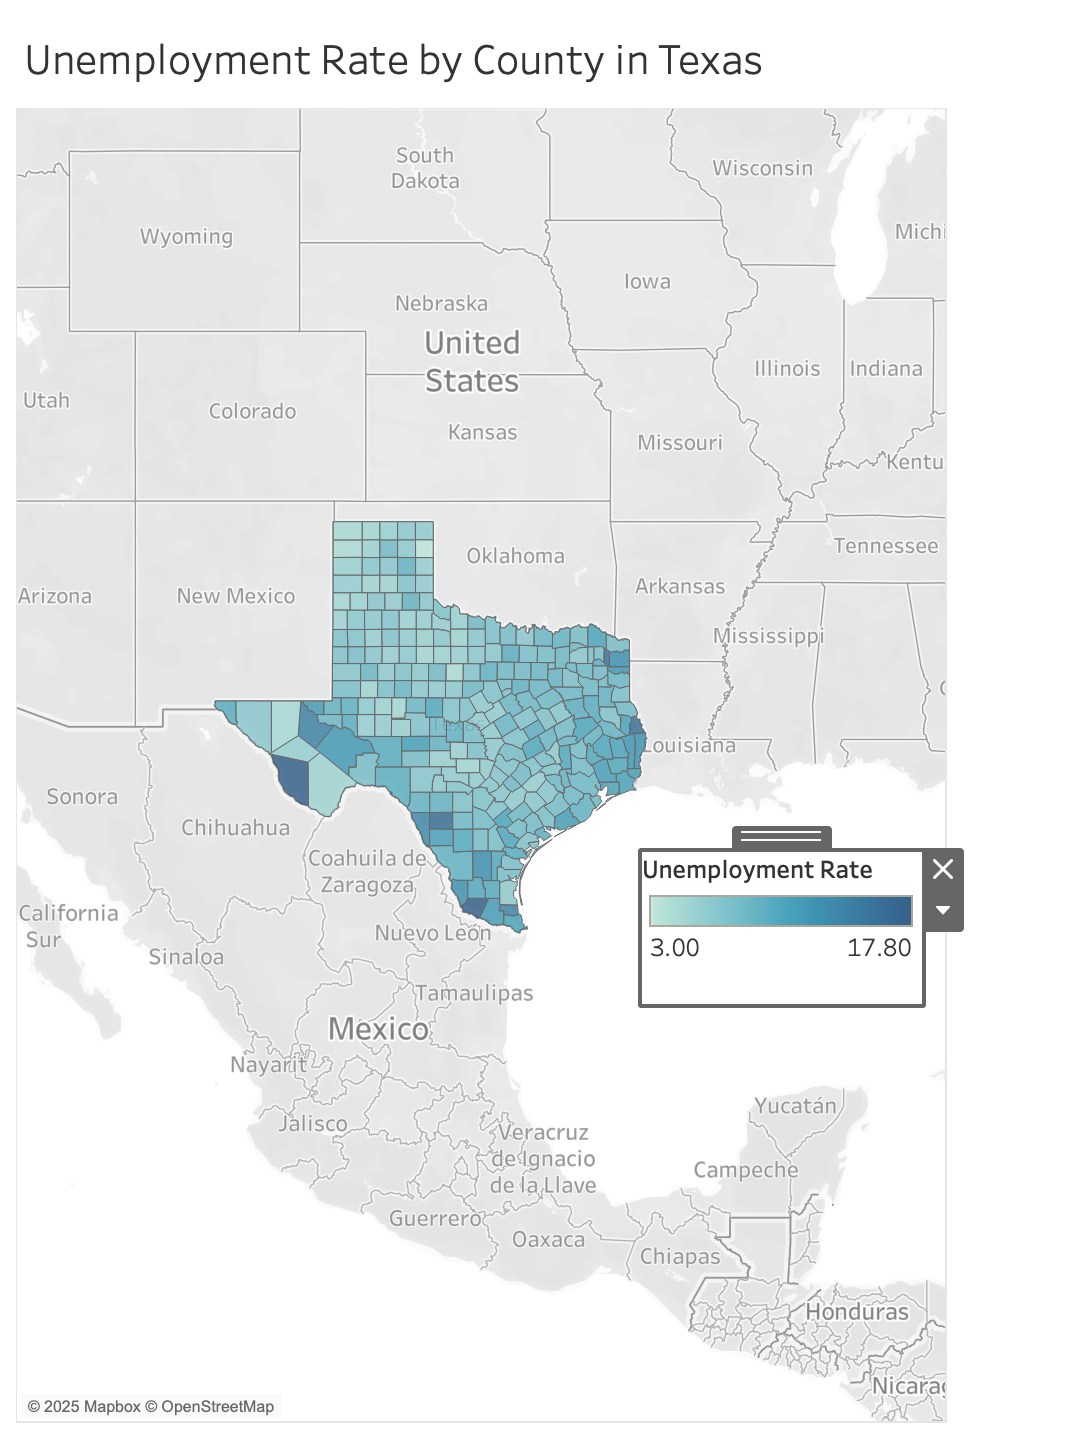

#### Part 3.1 Tableau bar plot (5 points)

+ Create a new Worksheet
+ Create a bar plot with the 2-digit State code and unployment rate
+ Sort the bar based on the unployment rate
+ Edit the figure title
+ Identify the top 3 and bottom 3 states/regions. 
+ Show the caption and edit the caption. In the caption, interpret the figure and include your finding about top 3 and bottom 3.
+ Export the Worksheet to a png file with the caption and include with the submission. 

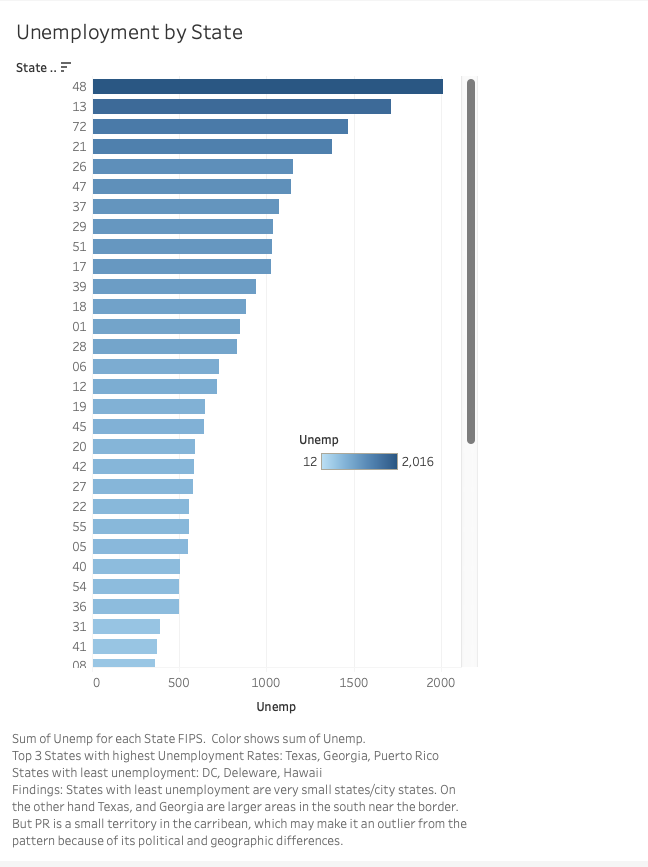